# Groupe non officiel 1
# Livrable 2 - Traitement d'images

|Auteur|Centre|
|---|---|
|ACQUART Quentin|Aix-en-Provence|
|DIMEGLIO Nicolas|Aix-en-Provence|
|ROMANO Sébastien|Aix-en-Provence|
|SIXDENIER Alexandre|Aix-en-Provence|
|VESSERON Alexandre|Aix-en-Provence|

## Rappel du sujet
L'entreprise voulant automatiser la sélection de photos pour l'annotations, le but est de fournir une méthode de classification binaire à fin de filtrer les images qui ne sont pas des photos du dataset de départ. Pour ce faire nous allons nous appuyer sur l'architecture des réseaux de neurones, ainsi que l'analyse des résultats obtenus.
Toutes les parties doivent être détaillées dans le notebook :
    - les paramètre du réseau,
    - la fonction de perte ainsi que l'algorithme d'optimisation utilisé pour l’entraînement.

## Analyse à effectuer

Le but de cette étape va être le suivant :
    Traiter l'ensemble des photographies via un bruitage puis un débruitage à fin d'améliorer leur qualité.
    Le tout à l'aide d'un auto-encodeur à convolution.


## Import des différentes bibliothèques

In [61]:
import pathlib
import zipfile
import os
import tensorflow as tf
from PIL import Image as Image
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

## Téléchargement des données et dezippage
Pour cette partie se referrer au notebook [Préparation des données](Préparation_des_données.ipynb#section_1)
## Récupération des données
Une fois les datasets mis en place, sélectionner le dataset à utiliser dans la variable `data_dir`

In [62]:
clean_dataset = "../DatasetL2/Project_Dataset_Unzip"

data_dir = clean_dataset

#data_dir = pathlib.Path(data_dir)

In [63]:
image_h = 180
image_w = 180
batch_s = 32

In [64]:
# Le train_set
x_train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split= 0.20,
  subset = 'training',
  seed=42,
  image_size=(image_h, image_w),
  batch_size=batch_s,
  color_mode='rgb',
  label_mode='int',
  labels="inferred",
)

# Le test_set
x_test = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split= 0.20,
  subset = 'validation',
  seed=42,
  image_size=(image_h, image_w),
  batch_size=batch_s,
  color_mode='rgb',
  label_mode='int',
  labels="inferred"
)

Found 150 files belonging to 1 classes.
Using 120 files for training.
Found 150 files belonging to 1 classes.
Using 30 files for validation.


In [65]:
class_names =  x_train.class_names #A COMPLETER
print(class_names)

['Dataset']


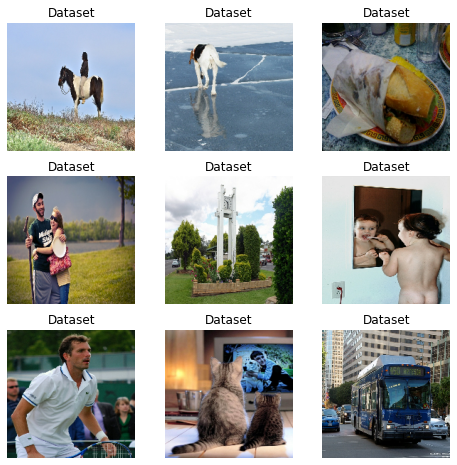

In [66]:
import matplotlib.pyplot as plt

def display_image(x,n):
    plt.figure(figsize=(8, 8))
    for images, labels in x.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
display_image(x_train,n=10)

AttributeError: 'BatchDataset' object has no attribute 'astype'